# Determine the mutation rate for the simulations

###  This Notebook was started on 10th April 2017

This code estimates the mutation rate necessary to produce the observed proportion of mutated sequences considering N cell cycles, for the Fast target in the embryo.

The unmutated portion of the sequences in the embryo is (1- 0.86955) = 0.13045  
THIS IS ALREADY CORRECTED FOR SEQUENCING ERRORS (From Fast_Embryo_Seq_Error_Correction.pynb)

## Assumptions

- The mutation rate (probability to get a deletion in the CRISPR target) is the same in all cell divisions.
- The mutation rate then can be estimated with a binomial distribution.
- The probability to have a mutated sequence in each N cell division is assumed to follow a geometric distribution.
- The overal probability after N cell divisions is estimated as the cumulative probabily.


In [1]:
library(repr)
options(repr.plot.width=6, repr.plot.height=5)

## Set variables

#### Aproximated unmutated proportion is 0.13045 

I will analyze the cumulative probabilities with a mutation rate (Mr) within the range of 0.1 to 0.2

I will consider cell divisions (Cc) from 0 to 17 (0 would be 1 cell)

In [2]:
unmutated = 0.13045 

## for many different mutation rates
Mr = seq(from= 0.1, to = 0.2, by = 0.0005)
## for 0 to 17 cell divisions
Cc = 0:17

## calculate the cumulative probab density and save it to a table
my_table = matrix(ncol = length(Cc), nrow = length(Mr), 
                  dimnames = list(Mr,Cc))

for(i in 1:length(Mr))
    {
    #print(cumsum(dgeom(Cc,Mr[i])))
    my_table[i,] = cumsum(dgeom(Cc,Mr[i]))
    }


In [3]:

for (i in 11:17)
    {
    my_opt = which(abs((1-unmutated)-my_table[,i])==min(abs((1-unmutated)-my_table[,i])))
    print(paste("for Ndiv = ",i, "the mutation rate is: ", rownames(my_table)[my_opt], sep =""))

    }


[1] "for Ndiv = 11the mutation rate is: 0.169"
[1] "for Ndiv = 12the mutation rate is: 0.156"
[1] "for Ndiv = 13the mutation rate is: 0.145"
[1] "for Ndiv = 14the mutation rate is: 0.1355"
[1] "for Ndiv = 15the mutation rate is: 0.127"
[1] "for Ndiv = 16the mutation rate is: 0.1195"
[1] "for Ndiv = 17the mutation rate is: 0.113"


## Plot for every Cell division the cumulative probability at different mutation rates

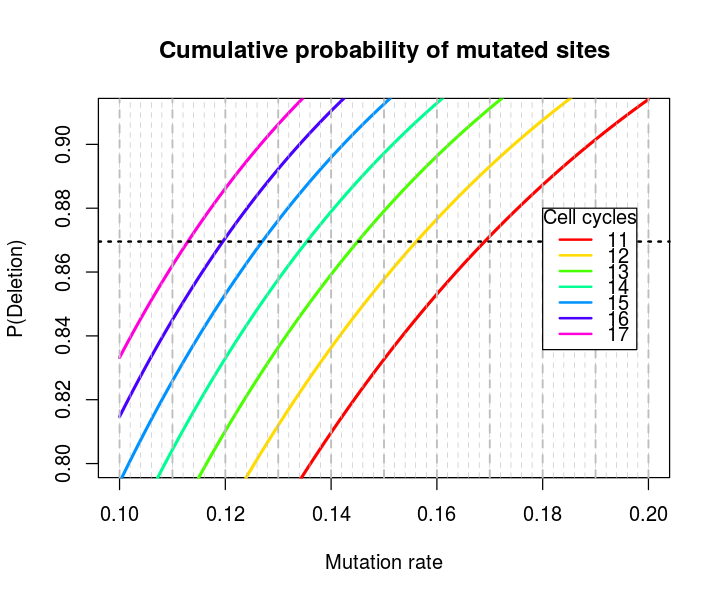

In [4]:
# create empty plot
plot(Mr,xlim = c(0.1,0.2),  ylim=c(0.8,0.91),
     main=paste("Cumulative probability of mutated sites", sep=""), 
     ylab="P(Deletion)", xlab="Mutation rate")

#define colors
colors <- rainbow(7)

# plot for every Cell division the cumulative probability at different mutation rates
for (i in c(1:7))
    {
    ii = 10+i
    lines(x= Mr, y = my_table[,ii], col=colors[i],lwd=2.5)
    }
# plot the real proportion
abline(h = (1-unmutated), col = "black", lty=3,lwd=2)

# make grid to see it more easily
for (i in c(seq(0.1,0.2,0.002)))
    {
    abline(v =i, col = "grey", lty=2,lwd=0.5)
    }
for (i in c(seq(0.1,0.2,0.01)))
{
    abline(v =i, col = "grey", lty=2,lwd=1.5)
}

# inset with color code
legend(legend = 10 +c(1:7), x = 0.18, y = 0.88,lwd= 2, lty=1,
        title="Cell cycles", col=colors)

Fig. The cumulative probability of having a mutated site given different mutation rates is shown for different cell divisions. The observed proportion of sites with a deletion is shown with the black dashed line.

## Analysis:

From the plot we can establish the mutation rate necessary to produce the observed deletions.

As we are not sure of when the deletions start (one possibility is around cell division 4-5, when the Maternal Zygotic transition begins), I will simulate different number of cell divisions:


|  Cell Cycle  | Mutation Rate  |
|--------------|----------------|
|     11       |      0.169     |
|     12       |      0.156     |
|     13       |      0.145     |
|     14       |      0.1355    |
|     15       |      0.127     |
|     16       |      0.1195    |
|     17       |      0.113     |
